## Feature Engineering - Lab 01

Importing necessary libraries

In [1]:
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier

C:\Users\Deshitha\AppData\Local\Temp\ipykernel_19832\2532877099.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load the CSV file containing the data set
df_train = pd.read_csv('train.csv')
print(f"Shape of the train data set: {df_train.shape}")

df_valid = pd.read_csv('valid.csv')
print(f"Shape of the validation data set: {df_valid.shape}")

df_test = pd.read_csv('X_test.csv')
print(f"Shape of the test data set: {df_test.shape}")

df_train.head()

Shape of the train data set: (517788, 145)
Shape of the validation data set: (172596, 145)
Shape of the test data set: (172596, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status
0,NaN,NaN,14000,14000,14000.0,36 months,7.35,434.53,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,2000,2000,2000.0,36 months,16.29,70.61,D,D2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,5000,5000,4750.0,36 months,7.39,155.28,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,20600,20600,20600.0,36 months,11.99,684.12,B,B5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,10000,10000,10000.0,36 months,7.39,310.56,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1


In [3]:
null_counts = df_train.isnull().sum()
print(null_counts)

id                       517788
member_id                517788
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
                          ...  
settlement_date          498528
settlement_amount        498528
settlement_percentage    498528
settlement_term          498528
loan_status                   0
Length: 145, dtype: int64


In [4]:
# Remove columns with more than 50% missing values
threshold = 0.5
columns_to_drop = df_train.columns[df_train.isnull().mean() > threshold].tolist()

print(columns_to_drop)

df_train.drop(columns_to_drop, axis=1, inplace=True)
df_valid.drop(columns_to_drop, axis=1, inplace=True)
df_test.drop(columns_to_drop, axis=1, inplace=True)

print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

df_train.head()

['id', 'member_id', 'url', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_add

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_status
0,14000,14000,14000.0,36 months,7.35,434.53,A,A4,Paralegal,1 year,...,0.0,1.0,67943.0,23659.0,13600.0,48043.0,N,Cash,N,1
1,2000,2000,2000.0,36 months,16.29,70.61,D,D2,NaN,NaN,...,1.0,0.0,9800.0,4168.0,1300.0,0.0,N,Cash,N,1
2,5000,5000,4750.0,36 months,7.39,155.28,A,A4,owner,4 years,...,0.0,0.0,237800.0,20061.0,64200.0,21600.0,N,Cash,N,1
3,20600,20600,20600.0,36 months,11.99,684.12,B,B5,NaN,NaN,...,0.0,0.0,105100.0,12355.0,15300.0,0.0,N,Cash,N,1
4,10000,10000,10000.0,36 months,7.39,310.56,A,A4,Senior UX designer,< 1 year,...,0.0,1.0,135735.0,141874.0,12000.0,123535.0,N,Cash,N,1


In [5]:
# Imput missing values in the columns
for col in df_train.columns:
    if col == 'loan_status':
        continue
    elif df_train[col].dtype == 'object':
        mode_value = df_train[col].mode()[0]
        df_train[col] = df_train[col].fillna(mode_value)
        df_valid[col] = df_valid[col].fillna(mode_value)
        df_test[col] = df_test[col].fillna(mode_value)
    else:
        mean_value = df_train[col].mean()
        df_train[col] = df_train[col].fillna(mean_value)
        df_valid[col] = df_valid[col].fillna(mean_value)
        df_test[col] = df_test[col].fillna(mean_value)

print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(517788, 87)
(172596, 87)
(172596, 86)


In [6]:
# Get the number of unique values in each column
unique_counts = df_train.nunique()

# Filter columns with only one unique value
constant_columns = unique_counts[unique_counts == 1].index.tolist()

df_train.drop(constant_columns, axis=1, inplace=True)
df_valid.drop(constant_columns, axis=1, inplace=True)
df_test.drop(constant_columns, axis=1, inplace=True)

print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(517788, 82)
(172596, 82)
(172596, 81)


In [7]:
categorical_cols = df_train.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'purpose', 'title',
       'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')


In [8]:
# Extract numerical part from 'zip_code' and convert to integers
df_train['zip_code'] = df_train['zip_code'].str.extract(r'(\d+)').astype(int)
df_valid['zip_code'] = df_valid['zip_code'].str.extract(r'(\d+)').astype(int)
df_test['zip_code'] = df_test['zip_code'].str.extract(r'(\d+)').astype(int)

In [9]:
# Drop column 'grade' because it has correlated values with 'sub_grade'
df_train.drop('grade', axis=1, inplace=True)
df_valid.drop('grade', axis=1, inplace=True)
df_test.drop('grade', axis=1, inplace=True)

print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(517788, 81)
(172596, 81)
(172596, 80)


In [10]:
ordinal_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

# Encode ordinal categorical values using the mapping dictionary
df_train['emp_length'] = df_train['emp_length'].map(ordinal_mapping)
df_valid['emp_length'] = df_valid['emp_length'].map(ordinal_mapping)
df_test['emp_length'] = df_test['emp_length'].map(ordinal_mapping)

In [11]:
# Classification of categorical columns into ordinal and nominal
ordinal_cols = pd.Index(['term', 'sub_grade', 'verification_status', 'initial_list_status', 'application_type', 'disbursement_method', 'debt_settlement_flag'])
nominal_cols = pd.Index(['home_ownership', 'purpose', 'addr_state'])

# Columns with date type values
date_cols = pd.Index(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'])

In [12]:
# Perform ordinal encoding on ordinal columns
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

df_train[ordinal_cols] = ordinal_encoder.fit_transform(df_train[ordinal_cols])
df_valid[ordinal_cols] = ordinal_encoder.transform(df_valid[ordinal_cols])
df_test[ordinal_cols] = ordinal_encoder.transform(df_test[ordinal_cols])

print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(517788, 81)
(172596, 81)
(172596, 80)


In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in nominal_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col])
    df_valid[col] = label_encoder.transform(df_valid[col])
    df_test[col] = label_encoder.transform(df_test[col])

print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(517788, 81)
(172596, 81)
(172596, 80)


In [14]:
# Set timestamps for date columns
for col in date_cols:
    df_train[col] = pd.to_datetime(df_train[col])
    df_valid[col] = pd.to_datetime(df_valid[col])
    df_test[col] = pd.to_datetime(df_test[col])

    min_date = df_train[col].min()
    
    df_train[col] = (df_train[col] - min_date).dt.days.astype(int)
    df_valid[col] = (df_valid[col] - min_date).dt.days.astype(int)
    df_test[col] = (df_test[col] - min_date).dt.days.astype(int)


C:\Users\Deshitha\AppData\Local\Temp\ipykernel_19832\3802811920.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train[col] = pd.to_datetime(df_train[col])
C:\Users\Deshitha\AppData\Local\Temp\ipykernel_19832\3802811920.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_valid[col] = pd.to_datetime(df_valid[col])
C:\Users\Deshitha\AppData\Local\Temp\ipykernel_19832\3802811920.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test[col] = pd.to_datetime(df_test[col])
C:\Users\Deshitha\AppData\Local\Temp\ipykernel_19832\3802811920.py:3: UserWarning: Could not inf

In [15]:
from sklearn.feature_selection import mutual_info_classif

print(df_train['emp_title'].nunique())
df_train['emp_title'] = df_train['emp_title'].factorize()[0]

# Get the mutual information of each feature
mi = mutual_info_classif(pd.DataFrame(df_train['emp_title']), df_train['loan_status'])
print(mi)

# Drop the 'emp_title' column
df_train.drop('emp_title', axis=1, inplace=True)
df_valid.drop('emp_title', axis=1, inplace=True)
df_test.drop('emp_title', axis=1, inplace=True)

175168
[0.00913235]


In [16]:
print(df_train['title'].nunique())
df_train['title'] = df_train['title'].factorize()[0]

# Get the mutual information of each feature
mi = mutual_info_classif(pd.DataFrame(df_train['title']), df_train['loan_status'])
print(mi)

# Drop the 'title' column
df_train.drop('title', axis=1, inplace=True)
df_valid.drop('title', axis=1, inplace=True)
df_test.drop('title', axis=1, inplace=True)

27117
[0.00355305]


In [ ]:
# get csv output
df_train.to_csv('Mid.csv', index=False)

In [17]:
from sklearn.feature_selection import mutual_info_classif

# Assuming 'X' is your dataset with all numerical columns and 'y' is your target variable
# If you don't have a target variable, you can omit it and compute mutual information for each feature independently

X_train = df_train.drop(columns=['loan_status']) # Features
y_train = df_train['loan_status'] # Target Variable

# Compute mutual information for each numerical feature
mi_values = mutual_info_classif(X_train, y_train)

# Create a DataFrame to store feature names and their corresponding MI values
mi_df = pd.DataFrame({'Feature': X_train.columns, 'MI Value': mi_values})

# Sort the DataFrame by MI values in descending order
mi_df = mi_df.sort_values(by='MI Value', ascending=False)

# Print the DataFrame with MI values for each numerical feature
print(mi_df)

                    Feature  MI Value
27          total_rec_prncp  0.595117
33          last_pymnt_amnt  0.386254
30               recoveries  0.317011
31  collection_recovery_fee  0.298163
25              total_pymnt  0.119733
..                      ...       ...
71                tax_liens  0.000000
46              delinq_amnt  0.000000
73        total_bal_ex_mort  0.000000
76      disbursement_method  0.000000
65             num_tl_30dpd  0.000000

[78 rows x 2 columns]


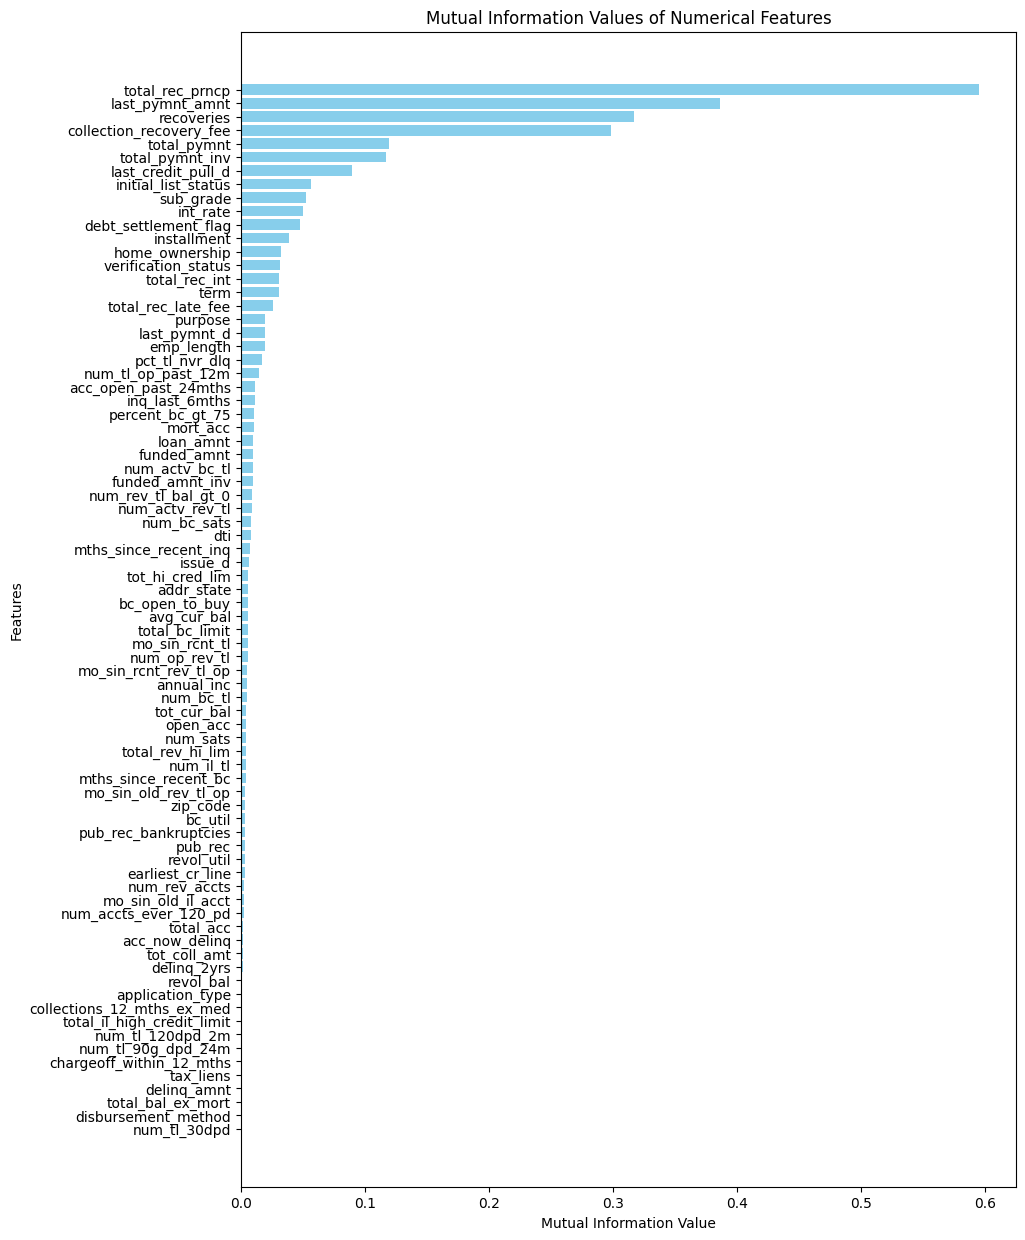

In [22]:
import matplotlib.pyplot as plt

# Plotting the graph
plt.figure(figsize=(10, 15))
plt.barh(mi_df['Feature'], mi_df['MI Value'], color='skyblue')
plt.xlabel('Mutual Information Value')
plt.ylabel('Features')
plt.title('Mutual Information Values of Features')
plt.gca().invert_yaxis()  # Invert y-axis to show feature with highest MI at the top
plt.show()

In [34]:
threshold_value = 0.025
selected_features = mi_df[mi_df['MI Value'] > threshold_value]['Feature'].tolist()

# Print the names of selected features
print("Selected Features with MI > 0.025:")
print(selected_features)

Selected Features with MI > 0.025:
['total_rec_prncp', 'last_pymnt_amnt', 'recoveries', 'collection_recovery_fee', 'total_pymnt', 'total_pymnt_inv', 'last_credit_pull_d', 'initial_list_status', 'sub_grade', 'int_rate', 'debt_settlement_flag', 'installment', 'home_ownership', 'verification_status', 'total_rec_int', 'term', 'total_rec_late_fee']


In [ ]:
# Split the Dataset into Features (X) and Target Variable (y)

X_train = df_train.drop(columns=['loan_status']) # Features
y_train = df_train['loan_status'] # Target Variable

X_val = df_valid.drop(columns=['loan_status']) # Features
y_val = df_valid['loan_status'] # Target Variable

In [ ]:
# Train a model with the XGBoost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

In [ ]:
y_pred = xgb_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# Save the predictions to a CSV file

results = pd.DataFrame({'loan_status': y_pred})
combined_data = pd.concat([X_val, results], axis=1)
combined_data.to_csv('210173T.csv', index=False)